# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Self-Driving-Car-Engineer-Nanodegree" data-toc-modified-id="Self-Driving-Car-Engineer-Nanodegree-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Self-Driving Car Engineer Nanodegree</a></div><div class="lev2 toc-item"><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Deep Learning</a></div><div class="lev2 toc-item"><a href="#Project:-Build-a-Traffic-Sign-Recognition-Classifier" data-toc-modified-id="Project:-Build-a-Traffic-Sign-Recognition-Classifier-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Project: Build a Traffic Sign Recognition Classifier</a></div><div class="lev2 toc-item"><a href="#Step-0:-Load-The-Data" data-toc-modified-id="Step-0:-Load-The-Data-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Step 0: Load The Data</a></div><div class="lev2 toc-item"><a href="#Step-1:-Dataset-Summary-&amp;-Exploration" data-toc-modified-id="Step-1:-Dataset-Summary-&amp;-Exploration-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Step 1: Dataset Summary &amp; Exploration</a></div><div class="lev2 toc-item"><a href="#Step-2:-Design-and-Test-a-Model-Architecture" data-toc-modified-id="Step-2:-Design-and-Test-a-Model-Architecture-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Step 2: Design and Test a Model Architecture</a></div><div class="lev2 toc-item"><a href="#Preprocessing" data-toc-modified-id="Preprocessing-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Preprocessing</a></div><div class="lev2 toc-item"><a href="#Augmentatation" data-toc-modified-id="Augmentatation-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Augmentatation</a></div><div class="lev2 toc-item"><a href="#Step-3:-Test-a-Model-on-New-Images" data-toc-modified-id="Step-3:-Test-a-Model-on-New-Images-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Step 3: Test a Model on New Images</a></div><div class="lev2 toc-item"><a href="#Step-4-(Optional):-Visualize-the-Neural-Network's-State-with-Test-Images" data-toc-modified-id="Step-4-(Optional):-Visualize-the-Neural-Network's-State-with-Test-Images-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Step 4 (Optional): Visualize the Neural Network's State with Test Images</a></div>

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
# NOTE: unique() returns dtype information, -1 to remove from length evaluation.
n_classes = len(set(y_train))  

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of unique classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of unique classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

25


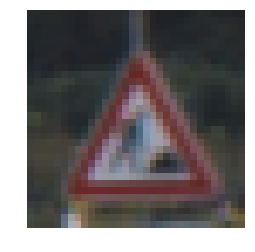

In [4]:
# Vizualize a random sample from the dataset. 
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis('off')
print(y_train[index])

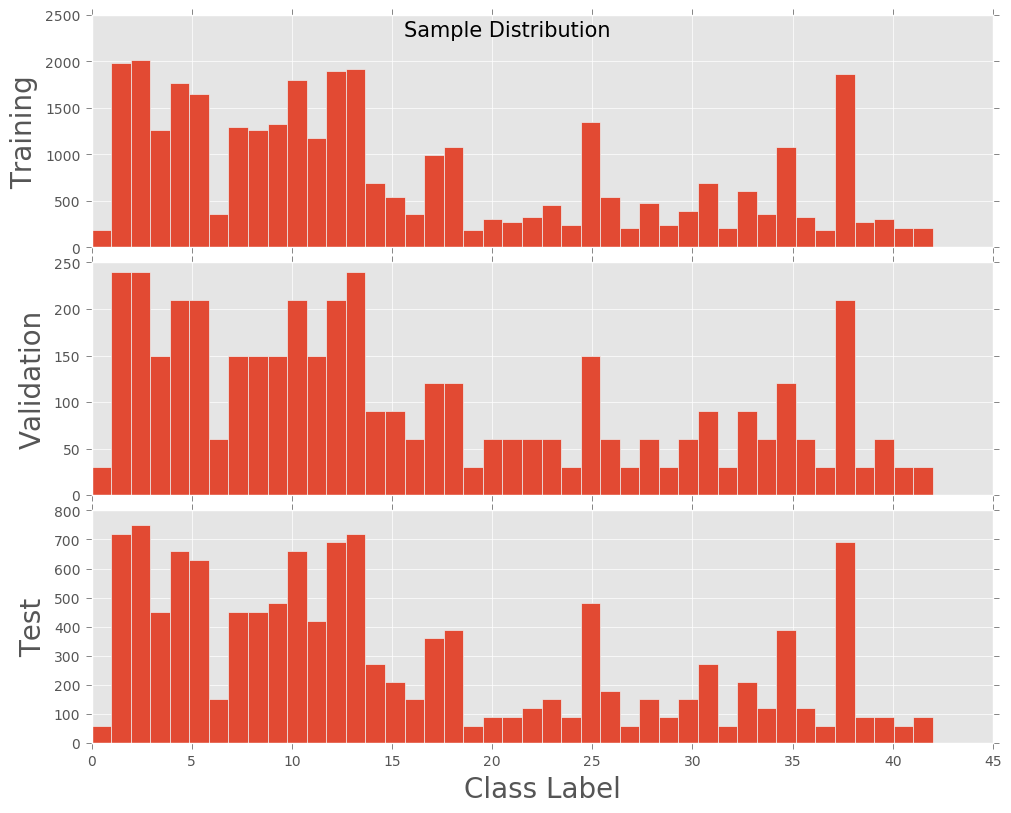

In [345]:
# Class distribution histogram
plt.style.use('ggplot')
plt.subplots(3, figsize=(10, 8), sharex=True)
plt.suptitle('Sample Distribution', size=15)

# Training
train_plot = plt.subplot(3,1,1)
plt.hist(y_train, bins=n_classes)
plt.ylabel('Training', size=20)
plt.setp(train_plot.get_xticklabels(), visible=False)
plt.plot()

# Validation
val_plot = plt.subplot(3,1,2)
plt.hist(y_valid, bins=n_classes)
plt.ylabel('Validation', size=20)
plt.setp(val_plot.get_xticklabels(), visible=False)
plt.plot()

# Test
plt.subplot(3,1,3)
plt.hist(y_test, bins=n_classes)
plt.ylabel('Test', size=20)
plt.xlabel('Class Label', size=20)
plt.plot()

plt.tight_layout(pad=0.4, h_pad=.2)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

## Preprocessing 

All required preprocessing has been handled in model using keras functions. Normalization and regularization have been implemented in the model, and will be flagged with a comment # !Preprocess. Keras defaults many shuffle operations throughout, so it's not neccessary to do that here. 

- Shuffle
- Normalization ( as BatchNormalization() ) 
- Regularization ( as kernal_regularizer='L2') 


## Augmentatation 

**Note to reviewer: Your welcome to skip this section if uninterested or in a hurry. The following has not been implemnented in the final classifier pipeline. For ease, all non-critical cells, have """ Not Implemented """ as a header. **

*See writeup for more details reguarding augmentation.* 

In [346]:
""" Not Implemented """

# Visualize Augmentation 
import os
from keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters 
datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1, # Low w,h shift because of appling higher zoon. 
        height_shift_range=0.1,
        shear_range=0.8,
        zoom_range=[.8, 0.5],# [lower, upper]: Don't want to zoom out, only in. 
        channel_shift_range=0.9,
        fill_mode='nearest')


# Execute augmentation generator on sample images for vizualization.

def vizualize_image(image):
    """ Processess randomly squeezed image from above, and saves to specified dir. """
    # Reshape: ImageDataGenerator.Flow() takes rank 4 data, input image.shape = (32, 32, 3) 
    image = image.reshape((1,) + image.shape) # New size: (1, 32, 32, 3)
    
    # Generate random batches of transformed images with ImageDataGenerator.flow()
    i = 0
    for batch in datagen.flow(image, batch_size=1,
                              save_to_dir='preview',
                              save_format='png'):
        i += 1
        if i > 19:
            break 


# Determine if function call is still required or not. 
if os.listdir('preview') == []:
    vizualize_image(image) 
else:
    print("Images already exist!")

Images already exist!


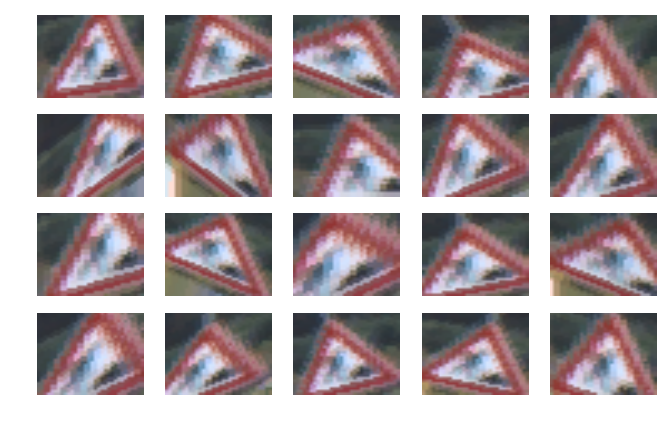

In [347]:
""" Not Implemented """
# Plot 
import matplotlib.image as mpimg

plt.style.use("classic")
plt.figure(frameon=False)

file_names = []
[file_names.append(i) for i in (os.listdir('preview'))]

i = 0 
i_list = []
while i < 19:
    for file in file_names:
        i = i + 1
        i_list.append(i)
        plt.subplot(5,5, i)
        plt.axis('off')
        img = mpimg.imread('preview/' + file)
        plt.imshow(img, aspect='auto')
        

In [138]:
""" Not Implemented """
# Data Aumentation

from numpy import unique as _unique
from numpy import empty, append

# Represent training sample distribution as a list. 
unique, counts = _unique(y_train, return_counts=True)
sample_distribution = zip(unique, counts)


# Determine what classes are underrepresented, and need augmentation.
low_keys = []
low_values = [] 
for key, value in sample_distribution:   
    if value < SAMPLE_THRESHOLD: # recall: SAMPLE_THRESHOLD = 900
        low_keys.append(key)
        low_values.append(value)
    else:
        pass


# Determine indices of original training data. (Source) 
slice_indices = []
for i in low_keys:
    a = sum(counts[:i])
    b = counts[i] + a
    slice_indices.append([a,b])


# Determine indices of <data>_to_augment. (Destination) 
for i in range(len(low_keys)):
    a = sum(low_values[:i])
    b = low_values[i] + a
    slice_indices[i].append(a)
    slice_indices[i].append(b)


# Initialize <data>_to_augment arrays
d1 = sum(low_values)
d2 = X_train.shape[1]
d3 = X_train.shape[2]
d4 = X_train.shape[3]

X_train_to_augment = empty((d1, d2, d3, d4))
y_train_to_augment = empty(d1)


# Copy original training data into <data>_to_augment 
for a,b,c,d in slice_indices:
    X_train_to_augment[c:d] = X_train[a:b]
    y_train_to_augment[c:d] = y_train[a:b]

    
# Prepair the data generator to run on <data>_to_augment.
augmented_datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1, # Low w,h shift because of appling higher zoon. 
        height_shift_range=0.1,
        shear_range=0.8,
        zoom_range=[.8, 0.5],# [lower, upper]: Don't want to zoom out, only in. 
        channel_shift_range=0.9,
        fill_mode='nearest')


# Determine augmentation volume
n_samples = 5000


# Generate augmented data.
i = 0 
samples = []
labels = []
for sample, label in augmented_datagen.flow(X_train_to_augment,
                                        y_train_to_augment,
                                        batch_size=1, # for easy counting
                                        seed=1):
    samples.append(sample)
    labels.append(label)
    i += 1
    if i > n_samples:
        break

        
# Currently, samples is a list of np.arrays. These must be extracted. 

# Initialize empty nd.arays
X_train_augmented = empty((n_samples, d2, d3, d4))
y_train_augmented = empty(n_samples)


# Extract into pure np.array 
for i in range(n_samples):
    X_train_augmented[i] = samples[i]
    y_train_augmented[i] = labels[i]
    
    
# Finally, merge augmented and original data. 
X_train_combined = append(X_train, X_train_augmented, 0)
y_train_combined = append(y_train, y_train_augmented, 0)



### Model Architecture

In [141]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [167]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, MaxPool2D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution2D
from keras.preprocessing.image import ImageDataGenerator



MODEL = 'model.h5'
BATCH_SIZE = 128
SEED = 1

kernel_size = (5, 5)
pool_size = (2, 2)
input_shape = (32, 32, 3)
padding = 'same'

model = Sequential()

# Normalize the input.   
model.add(BatchNormalization(input_shape=input_shape))  # !Preprocess


# Conv Layer 1 
model.add(Convolution2D(128, kernel_size, strides=(2, 2),
                        kernel_regularizer='l2',    # !Preprocess
                        kernel_initializer='glorot_normal',
                        padding=padding))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=pool_size))


# Conv Layer 2
model.add(Convolution2D(128, kernel_size, padding=padding))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=pool_size))


# Flatten
model.add(Flatten())


# Fully Connected 1
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.5))


# Fully Connected 2
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dropout(0.1))


# Fully Connected 3
model.add(Dense(n_classes, activation='softmax'))


# Compile 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [168]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [169]:
# Implement automatic learning rate decay. 
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,   # .5
                              patience=1,   # .1
                              verbose=1,
                              mode='auto',
                              epsilon=0.00005, # Lower threshold for change
                              cooldown=0,
                              min_lr=0)


In [170]:
# Train (fit) and validate. 
EPOCHS = 15 

# Set history to reference for later vizualizaiton. 
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=2, validation_data=(X_valid,y_valid), shuffle=True,
                   callbacks=[reduce_lr])

model.save(MODEL)

Train on 34799 samples, validate on 4410 samples
Epoch 1/15
17s - loss: 2.4380 - acc: 0.3208 - val_loss: 1.7257 - val_acc: 0.4619
Epoch 2/15
15s - loss: 1.0742 - acc: 0.6618 - val_loss: 0.8356 - val_acc: 0.7490
Epoch 3/15
15s - loss: 0.5968 - acc: 0.8183 - val_loss: 0.5856 - val_acc: 0.8365
Epoch 4/15
16s - loss: 0.4062 - acc: 0.8851 - val_loss: 0.5744 - val_acc: 0.8660
Epoch 5/15
15s - loss: 0.3138 - acc: 0.9145 - val_loss: 0.5344 - val_acc: 0.8741
Epoch 6/15
15s - loss: 0.2576 - acc: 0.9330 - val_loss: 0.3741 - val_acc: 0.9134
Epoch 7/15
15s - loss: 0.2220 - acc: 0.9432 - val_loss: 0.3665 - val_acc: 0.9252
Epoch 8/15
15s - loss: 0.1950 - acc: 0.9537 - val_loss: 0.4330 - val_acc: 0.8993
Epoch 9/15

Epoch 00008: reducing learning rate to 0.0005000000237487257.
16s - loss: 0.1796 - acc: 0.9593 - val_loss: 0.5072 - val_acc: 0.9000
Epoch 10/15
15s - loss: 0.0983 - acc: 0.9808 - val_loss: 0.3208 - val_acc: 0.9370
Epoch 11/15
15s - loss: 0.0870 - acc: 0.9830 - val_loss: 0.3392 - val_acc: 0.

##### Experiments and Testing 

Below was a (very) crude experiment logging process I applied for this project. Here is what a typical run entitles. 

1. Plan experiment on loose paper.  
2. Change model 
3. Fit and validate
4. Change test key
5. Vizualize run and save image. 


This worked okay, most epochs took ~4-8s. Only the last runs where I upped the filter count did they take longer (~15s). I regret using loose paper, and have since refined that process. 

The test_logs dir has been included in the repo, but its not really documented aside from a half encoded title. 

In [171]:
# Simple logging convention.. 
TEST_KEY = 'EX4: Test Convolution n_filters 128,128'

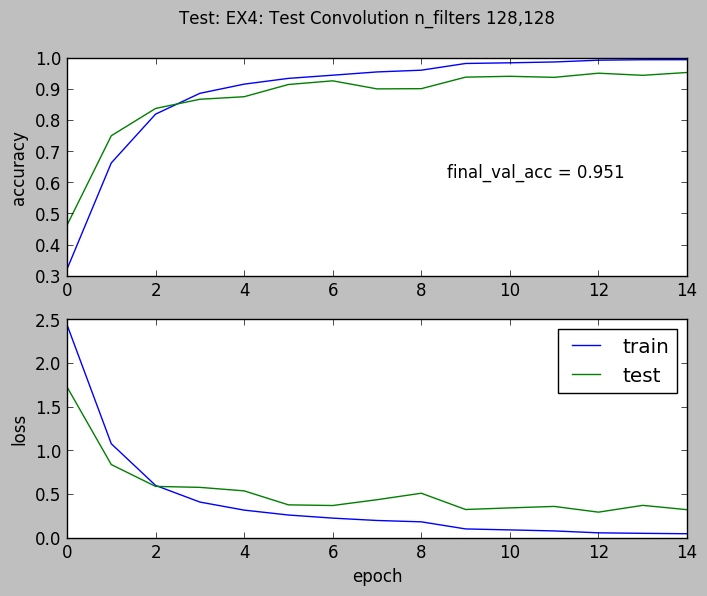

In [172]:
# Metric vizualization and logging 
plt.suptitle('Test: ' + TEST_KEY)
val_acc_last = str(history.history['val_acc'][-1:])

plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.figtext(0.6,0.7, 'final_val_acc = ' + val_acc_last[1:6])

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

#plt.tight_layout(pad=0.4, w_pad=6, h_pad=.5)

plt.savefig('test_logs/' + TEST_KEY + '.png')


In [173]:
# Test
metrics = model.evaluate(X_test, y_test)
for metric in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric]
    metric_value = metrics[metric]
    print('{}: {}'.format(metric_name, metric_value))

12544/12630 [============================>.] - ETA: 0s 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [174]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Image Origin
Images where selected from a google search for: german sign (*sign name*).

### Preprocessing
Cropped and scaled in image editing software to uniform 32x32.

### Implementation

In [213]:
# Load Images

# Create filename list
file_names = []
[file_names.append(i) for i in (os.listdir('new_images'))]

# Load files into ndarray
X_test2 = empty((len(file_names),32,32,3))
i = 0
for file in file_names:
    file = mpimg.imread("new_images/" + file)
    X_test2[i] = file
    i += 1
    
print("Shape: {} \nType: {}".format(X_test2.shape, type(X_test2)))

Shape: (5, 32, 32, 3) 
Type: <class 'numpy.ndarray'>


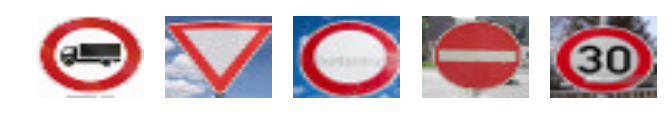

In [215]:
# Plot Images
from keras.preprocessing.image import array_to_img

plt.figure(frameon=False)

i = 0 
for file in X_test2:
    i += 1
    plt.subplot(5,5, i)
    plt.axis('off')
    file = array_to_img(file)
    plt.imshow(file, aspect='auto')

In [219]:
# Display file names/labels
file_names

['16.jpg', '13.jpg', '15.jpg', '17.jpg', '1.jpg']

In [257]:
# Hardcode y_test2 labels from file_names above.
# Convert to np array for later accuracy assessment. 
from numpy import asarray

y_test2_labels = [16, 13, 15, 17, 1]
y_test2_labels = asarray(y_test2_labels)

In [258]:
# TODO/IMPROVEMENT: Slice filename interator to automate y_test2 labeling 

### Predict the Sign Type for Each Image

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [349]:
# TODO: PREDICT
from keras.models import load_model

model = load_model(MODEL)

predictions = model.predict_classes(X_test2)

5/5 [==============================] - 0s


### Analyze Performance

In [355]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [356]:
# Accuraccy Vizualization

# Two np.arrays compared with the == operator return an array of booleans. 
predictions == y_test2_labels

array([ True,  True,  True,  True,  True], dtype=bool)

In [357]:
# With this output, an accuracy assesment can be determined. 

# Set assessemt with boolean array of correct and incorrect predictions. 
assessment = predictions == y_test2_labels

# Determine how many are correct by appending only true values to a list.
correct_assessments = []
for i in performance: 
    if i: 
        correct_assessments.append(i)

# Determine accuracy by comparing lengths of correct verses total assessment. 
def accuracy(full_assessment, correct_assessments):
    a = len(full_assessment)
    c = len(correct_assessments)
    d = a - c
    if d == 0:
        return 100
    else: 
        return ( d / a ) * 100

print("The test accuracy is: {}%".format(int(accuracy(assessment, correct_assessments))))

The test accuracy is: 100%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [376]:
import tensorflow as tf
from numpy import float64

# Run prediction on new images. 
preds = model.predict(X_test2) 


# Determine top five probabilities
x = tf.placeholder("float", [None, 32, 32, 3])
# NOTE: img = random image pulled earlier. Works. 
preds = tf.Session().run(tf.nn.top_k(preds, k=5), feed_dict={x:[img]})

preds

TopKV2(values=array([[  8.30128491e-01,   1.69871464e-01,   8.39487737e-16,
          9.02278752e-17,   1.69188700e-18],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   4.38291481e-16,   1.09013042e-20,
          1.67809382e-22,   4.04915913e-24],
       [  1.00000000e+00,   1.09989200e-13,   1.05075163e-25,
          3.14578162e-27,   1.93158604e-28],
       [  1.00000000e+00,   2.04567844e-21,   7.93713574e-22,
          1.20170017e-25,   2.13065949e-30]], dtype=float32), indices=array([[16,  9, 10, 23, 41],
       [13,  0,  1,  2,  3],
       [15,  9, 13,  5,  4],
       [17, 14,  9, 13, 22],
       [ 1,  0,  2,  4,  5]], dtype=int32))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [28]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")